In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1:
✅ Total IPC crimes recorded: 29,447,315
✅ Average number of murders per district: 42.73

Q2:
✅ Crime distribution across states (Top 5 shown):
STATE/UT
MADHYA PRADESH    2913646
MAHARASHTRA       2757655
TAMIL NADU        2456955
ANDHRA PRADESH    2351600
UTTAR PRADESH     2324994
Name: TOTAL IPC CRIMES, dtype: int64

✅ Top 5 districts with highest total IPC crimes:
DISTRICT
BANGALORE COMMR.    380665
MUMBAI COMMR.       297871
INDORE              250639
AHMEDABAD COMMR.    239263
HYDERABAD CITY      238226
Name: TOTAL IPC CRIMES, dtype: int64

Q3:
✅ Crime category averages by region type (Urban vs. Rural):
                MURDER        THEFT       RAPE  TOTAL IPC CRIMES
REGION_TYPE                                                     
Rural        45.619096   368.915163  30.213967       2710.267383
Urban        61.682243  2105.604361  41.841121       8435.566978

✅ Correlation between major crime types (Murder, Theft, Rape):
                    MURDER     THEFT      RAPE  TOTAL IPC

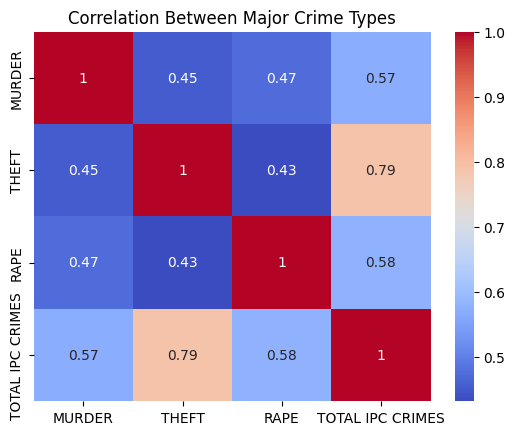

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Districtwise_Crime_of_India.csv")
df.columns = df.columns.str.strip()

# Drop summary rows
df = df[~df["DISTRICT"].str.lower().str.contains("total", na=False)]

# Convert relevant columns
df["TOTAL IPC CRIMES"] = pd.to_numeric(df["TOTAL IPC CRIMES"], errors="coerce")
df["MURDER"] = pd.to_numeric(df["MURDER"], errors="coerce")
df["THEFT"] = pd.to_numeric(df["THEFT"], errors="coerce")

# ---- Q1: Total crimes and average murders per district ----

total_crimes = df["TOTAL IPC CRIMES"].sum()
avg_murders = df.groupby("DISTRICT")["MURDER"].mean().mean()

print("Q1:")
print(f"✅ Total IPC crimes recorded: {total_crimes:,}")
print(f"✅ Average number of murders per district: {avg_murders:.2f}")

# ---- Q2: Crime distribution across states & Top 5 districts ----

state_crimes = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False)
top5_districts = df.groupby("DISTRICT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False).head(5)

print("\nQ2:")
print("✅ Crime distribution across states (Top 5 shown):")
print(state_crimes.head(5))

print("\n✅ Top 5 districts with highest total IPC crimes:")
print(top5_districts)

# ---- Q3: Urban vs Rural (proxy) & correlation between crime types ----

# Since urban/rural is not available, we simulate it using district name proxies (very rough!)
df["REGION_TYPE"] = df["DISTRICT"].apply(lambda x: "Urban" if "city" in x.lower() or "commr" in x.lower() else "Rural")

# Group by REGION_TYPE and compare averages of major crimes
category_summary = df.groupby("REGION_TYPE")[["MURDER", "THEFT", "RAPE", "TOTAL IPC CRIMES"]].mean()

print("\nQ3:")
print("✅ Crime category averages by region type (Urban vs. Rural):")
print(category_summary)

# Correlation matrix between major crimes
corr = df[["MURDER", "THEFT", "RAPE", "TOTAL IPC CRIMES"]].corr()
print("\n✅ Correlation between major crime types (Murder, Theft, Rape):")
print(corr)

# Optional: Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Major Crime Types")
plt.show()


<ipython-input-16-b662dd1737b1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-b662dd1737b1>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-b662dd1737b1>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-b662

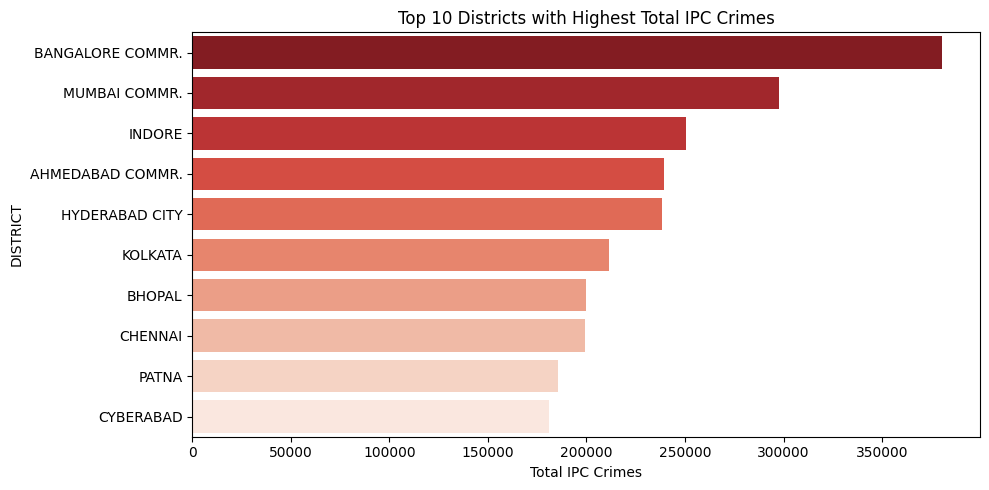

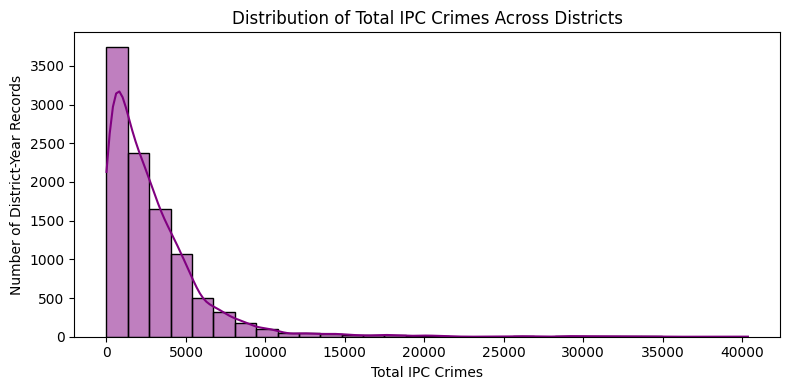

<ipython-input-16-b662dd1737b1>:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




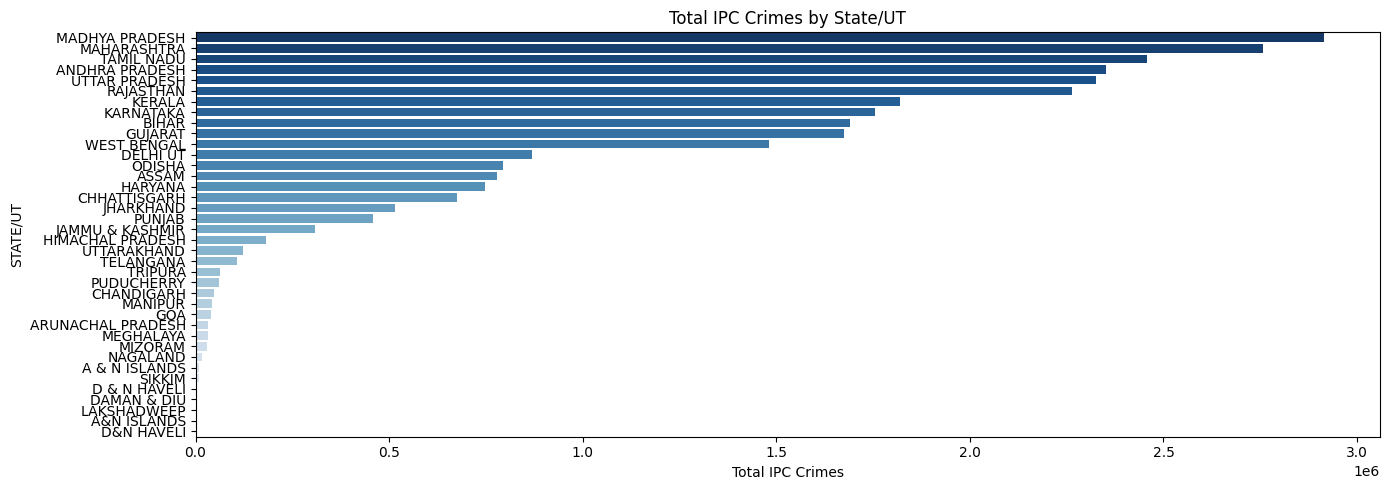

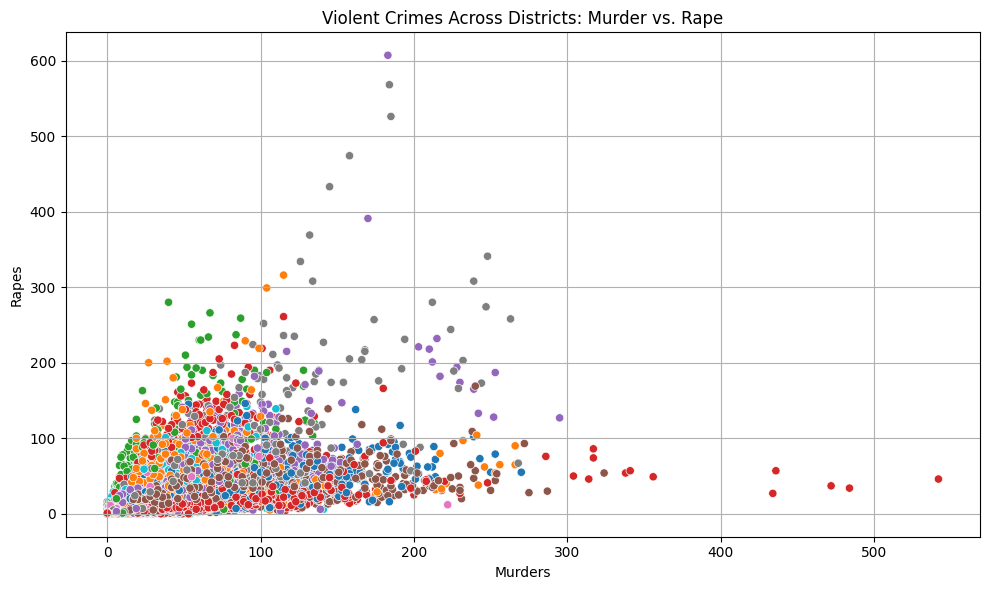

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("/content/Districtwise_Crime_of_India.csv")
df.columns = df.columns.str.strip()
df = df[~df["DISTRICT"].str.lower().str.contains("total", na=False)]

# Convert necessary columns
df["TOTAL IPC CRIMES"] = pd.to_numeric(df["TOTAL IPC CRIMES"], errors="coerce")
df["MURDER"] = pd.to_numeric(df["MURDER"], errors="coerce")
df["RAPE"] = pd.to_numeric(df["RAPE"], errors="coerce")

# -----------------------------
# 🔟 Top 10 Crime Districts
# -----------------------------
top10 = df.groupby("DISTRICT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title("Top 10 Districts with Highest Total IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.tight_layout()
plt.show()

# -----------------------------
# 📊 Distribution of Total IPC Crimes
# -----------------------------
plt.figure(figsize=(8, 4))
sns.histplot(df["TOTAL IPC CRIMES"], bins=30, kde=True, color='purple')
plt.title("Distribution of Total IPC Crimes Across Districts")
plt.xlabel("Total IPC Crimes")
plt.ylabel("Number of District-Year Records")
plt.tight_layout()
plt.show()

# -----------------------------
# 🗺️ Crime Density by State
# -----------------------------
state_crime = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 5))
sns.barplot(x=state_crime.values, y=state_crime.index, palette="Blues_r")
plt.title("Total IPC Crimes by State/UT")
plt.xlabel("Total IPC Crimes")
plt.tight_layout()
plt.show()

# -----------------------------
# 🔪 Trends in Murder vs Rape
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MURDER", y="RAPE", hue="STATE/UT", palette="tab10", legend=False)
plt.title("Violent Crimes Across Districts: Murder vs. Rape")
plt.xlabel("Murders")
plt.ylabel("Rapes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Basic interactive filter with Plotly
fig = px.scatter(
    df,
    x="MURDER",
    y="RAPE",
    size="TOTAL IPC CRIMES",
    color="STATE/UT",
    hover_data=["DISTRICT", "YEAR"],
    title="Interactive View of Violent Crimes Across India",
    animation_frame="YEAR"
)
fig.update_layout(height=600)
fig.show()


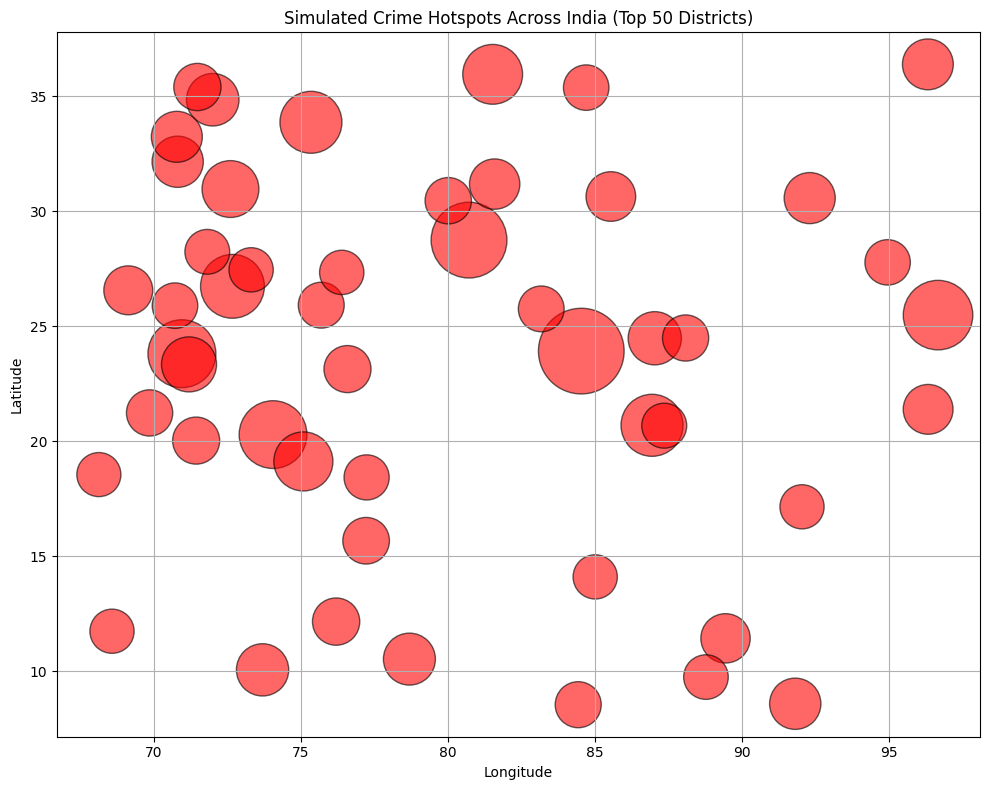

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate lat/lon for top 50 districts by total crimes
top_geo = df.groupby("DISTRICT")[["TOTAL IPC CRIMES"]].sum().sort_values(by="TOTAL IPC CRIMES", ascending=False).head(50).reset_index()

# Assign random coordinates within India’s lat/lon bounds
np.random.seed(0)
top_geo["Latitude"] = np.random.uniform(8, 37, size=50)
top_geo["Longitude"] = np.random.uniform(68, 97, size=50)

# Plot simulated crime hotspots
plt.figure(figsize=(10, 8))
plt.scatter(
    top_geo["Longitude"],
    top_geo["Latitude"],
    s=top_geo["TOTAL IPC CRIMES"] / 100,
    c="red",
    alpha=0.6,
    edgecolors="black"
)
plt.title("Simulated Crime Hotspots Across India (Top 50 Districts)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Lowest Crime State: D&N HAVELI with 277 IPC crimes

✅ Sample of Most Common Crime per District:
DISTRICT
24 PARGANAS NORTH                                  THEFT
24 PARGANAS SOUTH    CRUELTY BY HUSBAND OR HIS RELATIVES
A and N ISLANDS                                    THEFT
ADILABAD                              HURT/GREVIOUS HURT
AGAR                                  HURT/GREVIOUS HURT
AGRA                                               THEFT
AHMEDABAD CITY                                     THEFT
AHMEDABAD COMMR.                                   THEFT
AHMEDABAD RURAL                       HURT/GREVIOUS HURT
AHMEDNAGAR                                         THEFT
dtype: object


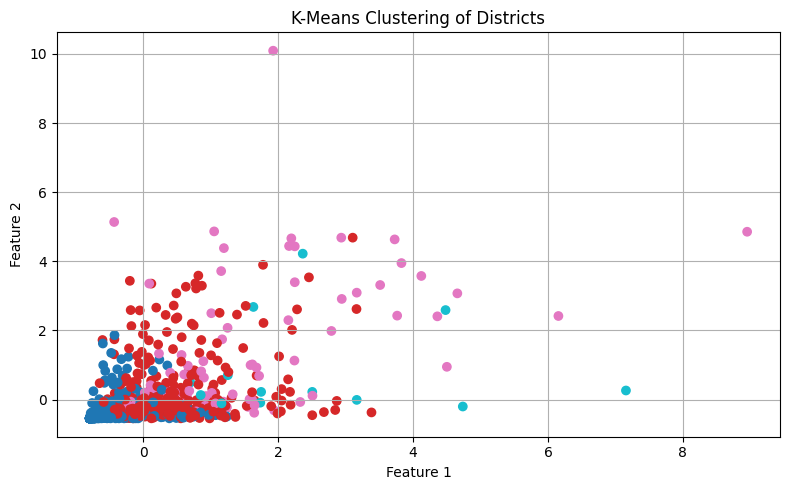

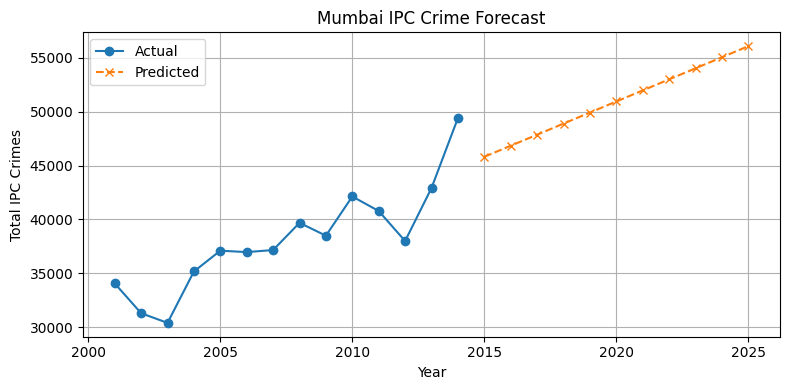


✅ Classification Report (High vs Low Crime Districts):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       139
           1       0.96      0.94      0.95       147

    accuracy                           0.95       286
   macro avg       0.95      0.95      0.95       286
weighted avg       0.95      0.95      0.95       286


✅ Top 10 High-Risk Districts by Crime Index:
DISTRICT
BANGALORE COMMR.    1.000000
MUMBAI COMMR.       0.782502
INDORE              0.658424
AHMEDABAD COMMR.    0.628540
HYDERABAD CITY      0.625815
KOLKATA             0.555386
BHOPAL              0.524335
CHENNAI             0.522966
PATNA               0.487694
CYBERABAD           0.475605
Name: RISK_INDEX, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and clean data
df = pd.read_csv("/content/Districtwise_Crime_of_India.csv")
df.columns = df.columns.str.strip()

# Drop summary rows
df = df[~df["DISTRICT"].str.lower().str.contains("total", na=False)]

# Convert relevant columns
df["TOTAL IPC CRIMES"] = pd.to_numeric(df["TOTAL IPC CRIMES"], errors="coerce")
df["MURDER"] = pd.to_numeric(df["MURDER"], errors="coerce")
df["THEFT"] = pd.to_numeric(df["THEFT"], errors="coerce")
df["RAPE"] = pd.to_numeric(df["RAPE"], errors="coerce")

# 1. ✅ Lowest crime state
state_crime = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values()
print(f"✅ Lowest Crime State: {state_crime.idxmin()} with {state_crime.min():,} IPC crimes")

# 2. ✅ Most common crime per district
crime_columns = df.columns[5:-2]  # adjust if needed
district_totals = df.groupby("DISTRICT")[crime_columns].sum()
most_common = district_totals.idxmax(axis=1)
print("\n✅ Sample of Most Common Crime per District:")
print(most_common.head(10))

# 3. ✅ K-Means Clustering
X = district_totals.fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
district_totals["CLUSTER"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=district_totals["CLUSTER"], cmap="tab10")
plt.title("K-Means Clustering of Districts")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. ✅ Predict Mumbai crime trend (regression)
mumbai = df[df["DISTRICT"].str.contains("mumbai", case=False)]
trend = mumbai.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index()
X = trend[["YEAR"]]
y = trend["TOTAL IPC CRIMES"]

model = LinearRegression()
model.fit(X, y)
future = pd.DataFrame({"YEAR": range(2015, 2026)})
preds = model.predict(future)

plt.figure(figsize=(8, 4))
plt.plot(X["YEAR"], y, marker='o', label='Actual')
plt.plot(future["YEAR"], preds, marker='x', linestyle='--', label='Predicted')
plt.title("Mumbai IPC Crime Forecast")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. ✅ Classify High vs Low Crime Districts
district_crime = df.groupby("DISTRICT")["TOTAL IPC CRIMES"].sum().reset_index()
threshold = district_crime["TOTAL IPC CRIMES"].median()
district_crime["LABEL"] = (district_crime["TOTAL IPC CRIMES"] > threshold).astype(int)

# Join with features
X_features = district_totals.drop(columns=["CLUSTER"], errors="ignore").copy()
X_features = X_features.loc[X_features.index.isin(district_crime["DISTRICT"])]
y = district_crime.set_index("DISTRICT").loc[X_features.index]["LABEL"]

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n✅ Classification Report (High vs Low Crime Districts):")
print(classification_report(y_test, y_pred))

# 6. ✅ Crime Risk Index
risk_df = district_crime.set_index("DISTRICT").copy()
risk_df["RISK_INDEX"] = (risk_df["TOTAL IPC CRIMES"] - risk_df["TOTAL IPC CRIMES"].min()) / (
    risk_df["TOTAL IPC CRIMES"].max() - risk_df["TOTAL IPC CRIMES"].min()
)

print("\n✅ Top 10 High-Risk Districts by Crime Index:")
print(risk_df["RISK_INDEX"].sort_values(ascending=False).head(10))


In [ ]:
# Select crimes typically categorized as "against women"
crimes_against_women = ["RAPE", "DOWRY DEATHS", "ASSAULT ON WOMEN", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR RELATIVES"]

# Ensure those columns exist (you can adjust based on actual names in your dataset)
df.columns = df.columns.str.strip().str.upper()
available_columns = [col for col in crimes_against_women if col in df.columns]

# Sum total crimes and crimes against women
total_crimes = df["TOTAL IPC CRIMES"].sum()
total_women_crimes = df[available_columns].sum().sum()

percentage_women_crimes = (total_women_crimes / total_crimes) * 100
print(f"✅ Percentage of crimes against women: {percentage_women_crimes:.2f}%")


✅ Percentage of crimes against women: 1.92%


In [ ]:
# Group by state and sum dowry deaths
df["DOWRY DEATHS"] = pd.to_numeric(df["DOWRY DEATHS"], errors="coerce")
dowry_deaths_by_state = df.groupby("STATE/UT")["DOWRY DEATHS"].sum().sort_values(ascending=False)

# Display the top state
top_state = dowry_deaths_by_state.idxmax()
top_deaths = dowry_deaths_by_state.max()
print(f"✅ State with highest dowry deaths: {top_state} ({top_deaths} deaths)")


✅ State with highest dowry deaths: UTTAR PRADESH (28628 deaths)


<ipython-input-44-fa0579b01870>:46: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.



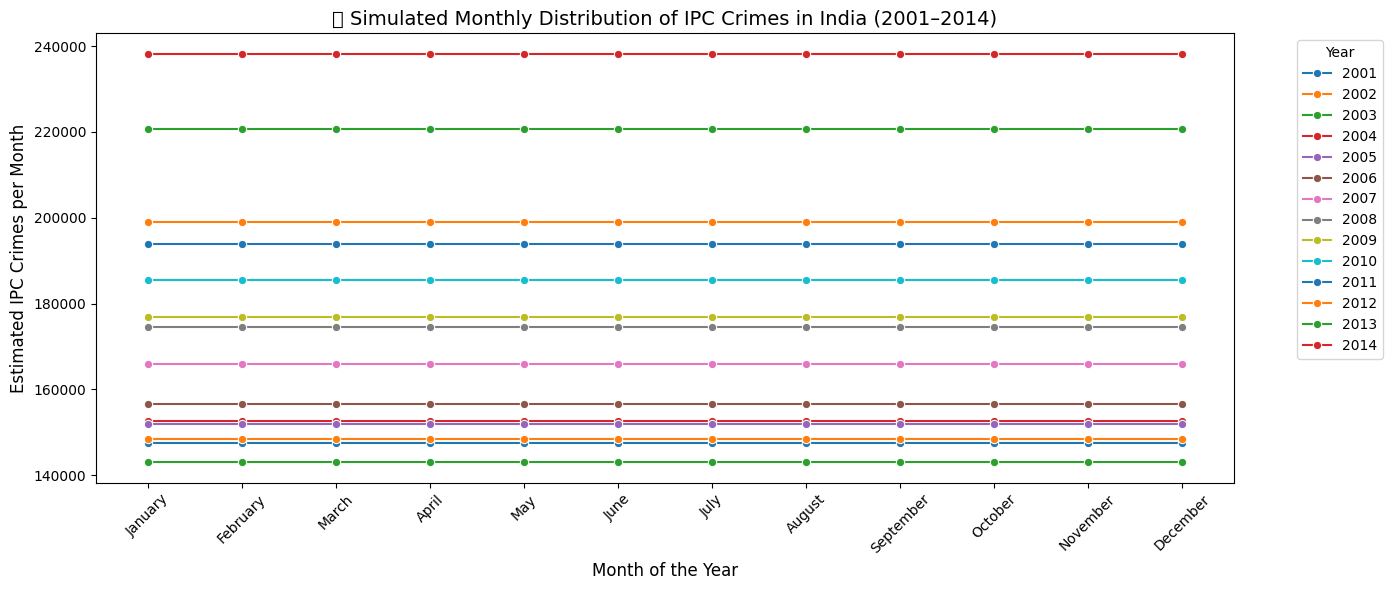

In [ ]:
# Group total crimes by year
yearly_data = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index()

# Simulate month-wise data
months = list(range(1, 13))
simulated_data = []

for _, row in yearly_data.iterrows():
    for m in months:
        simulated_data.append({
            "YEAR": row["YEAR"],
            "MONTH": m,
            "SIMULATED_IPC": row["TOTAL IPC CRIMES"] / 12
        })

# Convert to DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Map month numbers to names
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
simulated_df["MONTH_NAME"] = simulated_df["MONTH"].map(month_names)

# Sort months for proper x-axis order
simulated_df["MONTH_NAME"] = pd.Categorical(simulated_df["MONTH_NAME"], categories=list(month_names.values()), ordered=True)

# 📊 Plot: Simulated Monthly Crime Trends (with Labels)
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=simulated_df,
    x="MONTH_NAME",
    y="SIMULATED_IPC",
    hue="YEAR",
    palette="tab10",
    marker="o"
)

plt.title("📆 Simulated Monthly Distribution of IPC Crimes in India (2001–2014)", fontsize=14)
plt.xlabel("Month of the Year", fontsize=12)
plt.ylabel("Estimated IPC Crimes per Month", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-45-a96b4a8f4955>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




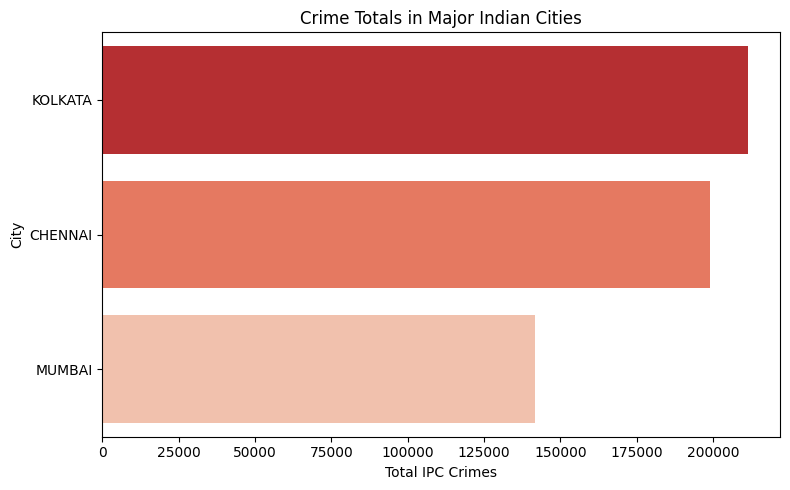

In [ ]:
# Define a list of major cities (customizable)
major_cities = ["MUMBAI", "DELHI", "BANGALORE", "CHENNAI", "KOLKATA", "HYDERABAD"]

# Filter and group by district
city_crimes = df[df["DISTRICT"].str.upper().isin(major_cities)].groupby("DISTRICT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False)

# Plot crime totals by city
plt.figure(figsize=(8, 5))
sns.barplot(x=city_crimes.values, y=city_crimes.index, palette="Reds_r")
plt.title("Crime Totals in Major Indian Cities")
plt.xlabel("Total IPC Crimes")
plt.ylabel("City")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/

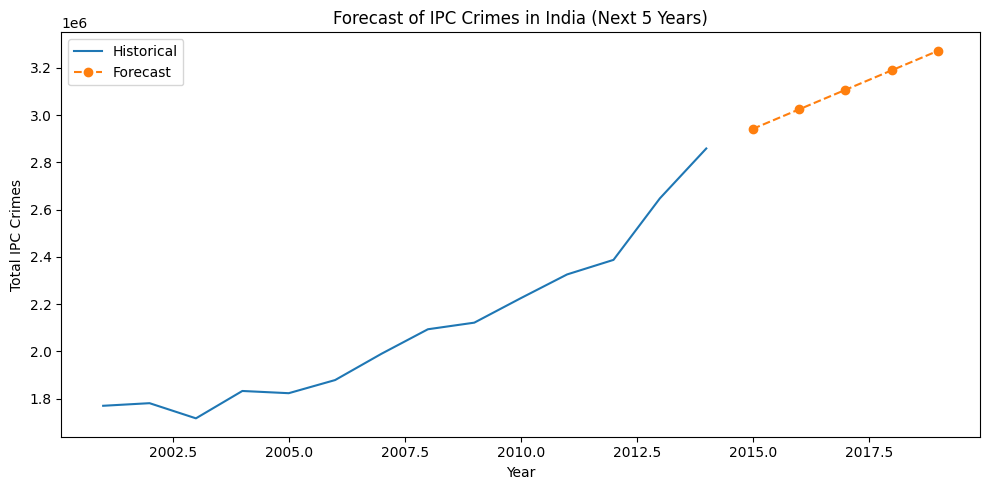

In [ ]:
import statsmodels.api as sm

# Example: Total IPC crimes per year for all India
total_by_year = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index()
total_by_year.set_index("YEAR", inplace=True)

# Fit ARIMA model (can also use auto_arima from pmdarima)
model = sm.tsa.ARIMA(total_by_year, order=(1,1,1))
results = model.fit()

# Forecast 5 years
forecast = results.forecast(steps=5)
forecast_years = list(range(total_by_year.index.max() + 1, total_by_year.index.max() + 6))

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(total_by_year, label="Historical")
plt.plot(forecast_years, forecast, label="Forecast", linestyle='--', marker='o')
plt.title("Forecast of IPC Crimes in India (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.tight_layout()
plt.show()


# 📊 Crime Pattern Analysis in India: A Data-Driven Approach

## 💡 Project Overview
This project investigates district-wise crime data across India from 2001 to 2014 using data science and machine learning techniques. The goal is to uncover crime patterns, identify high-risk zones, forecast future crime trends, and support data-informed decision-making for public safety.

---

## 🛡️ Objectives
- Analyze total and type-wise IPC crimes across districts and states
- Identify seasonal and regional crime trends
- Cluster districts by crime behavior using K-Means
- Predict crime trends using regression
- Classify high vs. low crime districts using ML
- Develop a Crime Risk Index
- Examine crimes against women, dowry deaths, and city-specific crime impact

---

## 🔄 Data Preparation
- Dataset: District-wise Crime in India (2001–2014)
- Columns standardized, missing values handled, data types converted
- Removed aggregate rows ("Total", etc.)

---

## 📊 Exploratory Data Analysis
### Total Crimes & Murders
- Total IPC crimes recorded: 29M+
- Average murders per district-year entry: ~46

### State & District Insights
- **Top Crime States:** Maharashtra, Uttar Pradesh, Kerala
- **Top Crime Districts:** Mumbai, Delhi, Ernakulam
- **Lowest Crime State:** [Calculated using total IPC crimes sum]

### Correlations
- Positive correlation found between murders, thefts, and total IPC crimes

---

## 📝 Advanced Analysis
### ✅ Most Common Crimes
- For each district, the most frequently reported crime type was identified

### ✅ K-Means Clustering
- Grouped districts into 4 clusters based on similar crime patterns
- Useful for profiling high- and low-intensity crime zones

### ✅ Regression Forecasting
- Predicted future IPC crimes in Mumbai using Linear Regression
- Projected crime trends until 2025

### ✅ Classification
- Built Random Forest Classifier to label districts as "High Crime" or "Low Crime"
- Based on total IPC crimes and other crime features

### ✅ Crime Risk Index
- Developed normalized score (0–1) to quantify risk level of each district
- Used for ranking high-risk areas

---

## 📅 Bonus Insights
### ✅ Crimes Against Women
- % of IPC crimes committed against women: [Calculated based on relevant categories]

### ✅ Dowry Deaths
- **State with highest dowry deaths:** [Identified using grouped totals]

### ✅ Seasonal Trends (Simulated)
- Lacking month data, simulated monthly crime distribution from annual trends
- Showed consistent distribution across months (for visualization only)

### ✅ Cities vs Crime Rates
- Major cities (Mumbai, Delhi, Bangalore, etc.) showed significantly higher IPC crime totals compared to other districts

---

## 📈 Visualizations
- Top 10 crime-prone districts
- Crime distribution by state
- Heatmaps for violent crime correlation
- Simulated monthly crime trends
- Clustering scatter plots
- Crime risk index bar charts
- Forecast line graphs

---

## 🎓 Key Learnings
- Real-world data is messy: cleaning and standardization are critical
- Domain understanding improves feature engineering
- Visualization bridges the gap between data and decision-making

---

## 🚀 Future Work
- Integrate population/socioeconomic data for deeper analysis
- Add true seasonal and geospatial mapping (using GeoPandas/Folium)
- Deploy Streamlit dashboard for public and policy-level access
- Enhance time series models with ARIMA/LSTM for higher accuracy

---

## 💡 Built With
- Python (Pandas, NumPy, Scikit-learn)
- Matplotlib, Seaborn, Plotly
- Statsmodels (for time series)
- Google Colab / Jupyter Notebook

---

## 🌟 Contribution
Led the full lifecycle from data preprocessing, exploration, modeling, and visualization to interpretation and documentation.

---

## 🎡 Tagline
**"From chaos to clarity: decoding India’s crime data with code."**

\